In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib

matplotlib.rcParams['svg.fonttype'] = 'none'

: 

# Import Data

Two files, because we had to restart the recording

Will append the two data files

In [2]:

first_data = pd.read_csv('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/wheels/20220206_BrooksCancerWheels_to20220212.csv', header=23)

second_data = pd.read_csv('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/wheels/20220212_BrooksCancerWheels_to20220308.csv', header=23)

In [3]:
cage1a = first_data[first_data['Cage'] == 1]
cage2a = first_data[first_data['Cage'] == 2]
cage3a = first_data[first_data['Cage'] == 3]
cage4a = first_data[first_data['Cage'] == 4]
cage5a = first_data[first_data['Cage'] == 5]
cage6a = first_data[first_data['Cage'] == 6]
cage7a = first_data[first_data['Cage'] == 7]
cage8a = first_data[first_data['Cage'] == 8]

In [4]:
cage1b = second_data[second_data['Cage'] == 1]
cage2b = second_data[second_data['Cage'] == 2]
cage3b = second_data[second_data['Cage'] == 3]
cage4b = second_data[second_data['Cage'] == 4]
cage5b = second_data[second_data['Cage'] == 5]
cage6b = second_data[second_data['Cage'] == 6]
cage7b = second_data[second_data['Cage'] == 7]
cage8b = second_data[second_data['Cage'] == 8]

In [5]:
cage1 = cage1a.append(cage1b)
cage2 = cage2a.append(cage2b)
cage3 = cage3a.append(cage3b)
cage4 = cage4a.append(cage4b)
cage5 = cage5a.append(cage5b)
cage6 = cage6a.append(cage6b)
cage7 = cage7a.append(cage7b)
cage8 = cage8a.append(cage8b)

In [6]:
cages = [cage1, cage2, cage3, cage4, cage5, cage6, cage7, cage8]

In [7]:
for cage in cages:
    #convert Time from object to a date/time variable
    cage["Time"] = pd.to_datetime(cage['Time'])

    #convert wheel counts into distance in km
    #Diameter of wheel is 9.2 cm, circumference equals pi*diameter, thus counts*pi*9.2 = distance in cm
    #distance in cm / 100 = distance in meters
    cage["Distance_meters"] = (cage["Wheel (counts)"] * math.pi * 9.2)/100
    #reset the index to the time series
    cage_resamp = cage.resample('D', on='Time').sum()

In [8]:
#1-4, the last week was vacant

cage_resampled1 = cage1.resample('D', on='Time').sum().iloc[:-8,:]
cage_resampled2 = cage2.resample('D', on='Time').sum().iloc[:-8,:]
cage_resampled3 = cage3.resample('D', on='Time').sum().iloc[:-8,:]
cage_resampled4 = cage4.resample('D', on='Time').sum().iloc[:-8,:]

#5-8 the first week was vacant
cage_resampled5 = cage5.resample('D', on='Time').sum().iloc[7:-1,:]
cage_resampled6 = cage6.resample('D', on='Time').sum().iloc[7:-1,:]
cage_resampled7 = cage7.resample('D', on='Time').sum().iloc[7:-1,:]
cage_resampled8 = cage8.resample('D', on='Time').sum().iloc[7:-1,:]

In [9]:
cages_resampled = [cage_resampled1, cage_resampled2, cage_resampled3, cage_resampled4, cage_resampled5, cage_resampled6, cage_resampled7, cage_resampled8]

In [10]:
for cage in cages_resampled:
    cage['Day'] = np.arange(len(cage))

In [11]:
cage_resampled1['Mouse'] = 1
cage_resampled1['Condition'] = 'DCA'
cage_resampled2['Mouse'] = 3
cage_resampled2['Condition'] = 'Control'
cage_resampled3['Mouse'] = 5
cage_resampled3['Condition'] = 'DCA'
cage_resampled4['Mouse'] = 7
cage_resampled4['Condition'] = 'Control'
cage_resampled5['Mouse'] = 9
cage_resampled5['Condition'] = 'DCA'
cage_resampled6['Mouse'] = 11
cage_resampled6['Condition'] = 'Control'
cage_resampled7['Mouse'] = 13
cage_resampled7['Condition'] = 'DCA'
cage_resampled8['Mouse'] = 15
cage_resampled8['Condition'] = 'Control'

In [12]:
all_cages = pd.concat([cage_resampled1, cage_resampled2, cage_resampled3, cage_resampled4, cage_resampled5, cage_resampled6, cage_resampled7, cage_resampled8])
all_cages

,Int,Cage,Wheel (counts),Wheel Accum (counts),Unnamed: 5,Distance_meters,Day,Mouse,Condition
Time,,,,,,,,,
2022-02-06,1596,57,22,239,0.0,6.358584,0,1,DCA
2022-02-07,18504,144,1211,30139,0.0,350.011121,1,1,DCA
2022-02-08,39240,144,2094,276510,0.0,605.221542,2,1,DCA
2022-02-09,59976,144,4487,591498,0.0,1296.862014,3,1,DCA
2022-02-10,80712,144,5981,1499746,0.0,1728.667641,4,1,DCA
...,...,...,...,...,...,...,...,...,...
2022-03-03,394200,1152,29283,71921807,0.0,8463.563706,18,15,Control
2022-03-04,414936,1152,26577,76262378,0.0,7681.457932,19,15,Control
2022-03-05,435672,1152,23642,79689498,0.0,6833.165083,20,15,Control


In [29]:
all_cages_reset = all_cages.reset_index()


<AxesSubplot:xlabel='Day', ylabel='Distance_meters'>

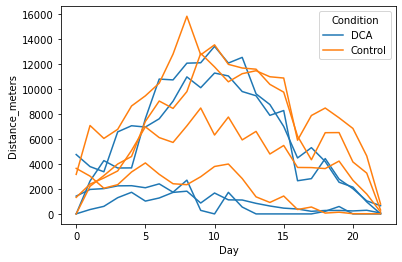

In [42]:
sns.lineplot(data=all_cages_reset, x='Day', y='Distance_meters', hue='Condition', units='Mouse', estimator=None)

<AxesSubplot:xlabel='Day', ylabel='Distance_meters'>

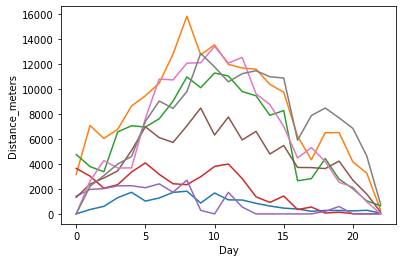

In [12]:
sns.lineplot(data=cage_resampled1, x='Day', y='Distance_meters')
sns.lineplot(data=cage_resampled2, x='Day', y='Distance_meters')
sns.lineplot(data=cage_resampled3, x='Day', y='Distance_meters')
sns.lineplot(data=cage_resampled4, x='Day', y='Distance_meters')
sns.lineplot(data=cage_resampled5, x='Day', y='Distance_meters')
sns.lineplot(data=cage_resampled6, x='Day', y='Distance_meters')
sns.lineplot(data=cage_resampled7, x='Day', y='Distance_meters')
sns.lineplot(data=cage_resampled8, x='Day', y='Distance_meters')

#lt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/daily_activity_summary.svg', dpi=300, bbox_inches='tight')

Values to obtain:
1. Peak Daily Activity
2. Average Daily Activity
3. First Week Activity
4. Second Week Average Activity
5. Last Week Activity

In [13]:
columns = ['Mouse', 'peak_activity_m_day', 'avg_activity_m_day', 'first_wk__activity_m_day', 'second_wk__activity_m_day', 'last_wk__activity_m_day']

Mouse = [1,3,5,7,9,11,13,15]

peak_activity_m_day = [cage_resampled1['Distance_meters'].max(), cage_resampled2['Distance_meters'].max(), cage_resampled3['Distance_meters'].max(), cage_resampled4['Distance_meters'].max(), cage_resampled5['Distance_meters'].max(), cage_resampled6['Distance_meters'].max(), cage_resampled7['Distance_meters'].max(), cage_resampled8['Distance_meters'].max()]

avg_activity_m_day = [cage_resampled1['Distance_meters'].mean(), cage_resampled2['Distance_meters'].mean(), cage_resampled3['Distance_meters'].mean(), cage_resampled4['Distance_meters'].mean(), cage_resampled5['Distance_meters'].mean(), cage_resampled6['Distance_meters'].mean(), cage_resampled7['Distance_meters'].mean(), cage_resampled8['Distance_meters'].mean()]

first_wk__activity_m_day = [cage_resampled1['Distance_meters'][0:7].mean(), cage_resampled2['Distance_meters'][0:7].mean(), cage_resampled3['Distance_meters'][0:7].mean(), cage_resampled4['Distance_meters'][0:7].mean(), cage_resampled5['Distance_meters'][0:7].mean(), cage_resampled6['Distance_meters'][0:7].mean(), cage_resampled7['Distance_meters'][0:7].mean(), cage_resampled8['Distance_meters'][0:7].mean()]

second_wk__activity_m_day = [cage_resampled1['Distance_meters'][7:14].mean(), cage_resampled2['Distance_meters'][7:14].mean(), cage_resampled3['Distance_meters'][7:14].mean(), cage_resampled4['Distance_meters'][7:14].mean(), cage_resampled5['Distance_meters'][7:14].mean(), cage_resampled6['Distance_meters'][7:14].mean(), cage_resampled7['Distance_meters'][7:14].mean(), cage_resampled8['Distance_meters'][7:14].mean()]

last_wk__activity_m_day = [cage_resampled1['Distance_meters'][len(cage_resampled1['Distance_meters'])-7:].mean(), cage_resampled2['Distance_meters'][len(cage_resampled2['Distance_meters'])-7:].mean(), cage_resampled3['Distance_meters'][len(cage_resampled3['Distance_meters'])-7:].mean(), cage_resampled4['Distance_meters'][len(cage_resampled4['Distance_meters'])-7:].mean(), cage_resampled5['Distance_meters'][len(cage_resampled5['Distance_meters'])-7:].mean(), cage_resampled1['Distance_meters'][len(cage_resampled1['Distance_meters'])-7:].mean(), cage_resampled6['Distance_meters'][len(cage_resampled1['Distance_meters'])-7:].mean(), cage_resampled7['Distance_meters'][len(cage_resampled1['Distance_meters'])-7:].mean(), cage_resampled8['Distance_meters'][len(cage_resampled1['Distance_meters'])-7:].mean()]

In [14]:
wheel_summary_data = pd.DataFrame(list(zip(Mouse, peak_activity_m_day, avg_activity_m_day, first_wk__activity_m_day, second_wk__activity_m_day, last_wk__activity_m_day)), columns=columns)

In [15]:
#wheel_summary_data.to_csv('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/data/wheels/wheel_summary_data.csv')

In [16]:
wheel_summary_long = pd.melt(wheel_summary_data, id_vars='Mouse',  var_name="measurement")

<AxesSubplot:xlabel='value', ylabel='measurement'>

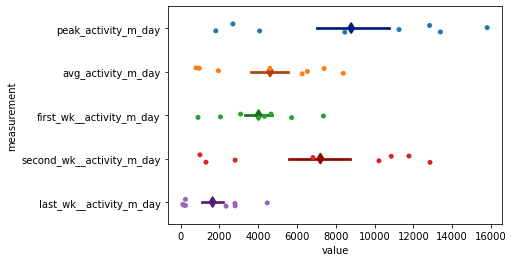

In [17]:
sns.stripplot(x="value", y="measurement",
              data=wheel_summary_long, dodge=.8 - .8 / 3,
              #join=False, 
              #palette="dark",
              #markers="d", 
              #scale=.75, ci=68
              )

sns.pointplot(x="value", y="measurement",
              data=wheel_summary_long, dodge=.8 - .8 / 3,
              join=False, palette="dark", markers="d", scale=1.0, ci=68)
#plt.savefig('/Users/brooksleitner/Desktop/Python/PerryLabData/ExerciseCancer/ExerciseCancerMouseData/figures/activity_summary.svg', dpi=300, bbox_inches='tight')

In [19]:
wheel_summary_long

,Mouse,measurement,value
0,1,peak_activity_m_day,1816.531704
1,3,peak_activity_m_day,15799.923968
2,5,peak_activity_m_day,11260.473380
3,7,peak_activity_m_day,4074.695937
4,9,peak_activity_m_day,2699.218709
5,11,peak_activity_m_day,8464.430786
6,13,peak_activity_m_day,13389.731783
7,15,peak_activity_m_day,12832.777671
8,1,avg_activity_m_day,795.375862
9,3,avg_activity_m_day,8386.079465
